# Complexation

##### Germain Vallverdu [germain.vallverdu@univ-pau.fr](germain.vallverdu@univ-pau.fr)

## Python set up

In [2]:
%pylab --no-import-all inline
from scipy.optimize import fsolve
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

Populating the interactive namespace from numpy and matplotlib


## Equations

Considering complexation equilibria, we want to compute concentration of free metal ions $[M]$, free ligands $[L]$ and complex compounds $[M_2L_n]$ with $n= \lbrace 2, 5, 7 \rbrace$. Ligand are also involved in a acido-basic equilibrium with $[L]$ et $[LH]$ :

\begin{align}
    2M + n L^- & \leftrightarrows M_2L_n & K_d & = \frac{[M]^2[L^-]^n}{[M_2L_n]} \\
    L^- + H^+ & \leftrightarrows HL & K_A & = \frac{[L^-][H^+]}{[HL]}
\end{align}

There are all equations defining the system :

\begin{align*}
    K_{d_{app}, 2} & = \frac{[M]^2[L^-]^7}{[M_2L_7]} &
    K_{d_{app}, 3} & = \frac{[M]^2[L^-]^5}{[M_2L_5]} &
    K_{d_{app}, 4} & = \frac{[M]^2[L^-]^3}{[M_2L_3]}
\end{align*}

\begin{align*}
    [M_{tot}] & = [M] + 2[M_2L_7] + 2[M_2L_5] + 2[M_2L_3] \\
    [L_{tot}] & = [L] + 3[M_2L_3] + 5[M_2L_5] + 7[M_2L_7] + [HL]
\end{align*}

with $Ka = [L^-][H^+] \,/\,[LH]$ you get

\begin{align}
    [Cr]_{tot} & = [M] + 2[M_2L_7] + 2[M_2L_5] + 2[M_2L_3] \\
    [L^-]_{tot} & = \left(1 + \frac{[H^+]}{Ka}\right)[L^-] + 3[M_2L_3] + 5[M_2L_5] + 7[M_2L_7]
\end{align}

One can reduce the system to 2 equations with 2 unknowns using :

\begin{align*}
    [M_2L_7] & = \frac{[M]^2[L^-]^7}{K_{d_{app}, 2}} &
    [M_2L_5] & = \frac{[M]^2[L^-]^5}{K_{d_{app}, 3}} &
    [M_2L_3] & = \frac{[M]^2[L^-]^3}{K_{d_{app}, 4}}
\end{align*}

Now equations of $[M]_{tot}$ and $[L^-]_{tot}$ reads 

\begin{align}
    [M]_{tot} & = [M] + 2\frac{[M]^2[L^-]^7}{K_{d_{app}, 2}}  
                       + 2\frac{[M]^2[L^-]^5}{K_{d_{app}, 3}} 
                       + 2\frac{[M]^2[L^-]^3}{K_{d_{app}, 4}} \\
    [L^-]_{tot} & = \left(1 + \frac{[H^+]}{Ka}\right)[L^-] + 3\frac{[M]^2[L^-]^3}{K_{d_{app}, 4}} 
                                                           + 5\frac{[M]^2[L^-]^5}{K_{d_{app}, 3}} 
                                                           + 7\frac{[M]^2[L^-]^7}{K_{d_{app}, 2}}
\end{align}

we have only 2 unknowns, $[M]$ and $[L^-]$, and we will solve the following system :

\begin{equation}
    \begin{cases}
    [M] + 2\dfrac{[M]^2[L^-]^7}{K_{d_{app}, 2}}  
        + 2\dfrac{[M]^2[L^-]^5}{K_{d_{app}, 3}} 
        + 2\dfrac{[M]^2[L^-]^3}{K_{d_{app}, 4}} - [M]_{tot} = 0 & (1) \\
    \left(1 + \dfrac{[H^+]}{Ka}\right)[L^-] + 3\dfrac{[M]^2[L^-]^3}{K_{d_{app}, 4}} 
                                           + 5\dfrac{[M]^2[L^-]^5}{K_{d_{app}, 3}} 
                                           + 7\dfrac{[M]^2[L^-]^7}{K_{d_{app}, 2}} - [L^-]_{tot} = 0 & (2) 
    \end{cases}
\end{equation}

Actually, you may also extract $[M]^2$ from equation (2) and work with only one equation.

## Data

pH, Ka, $[Cr]_{tot}$ and $[L^-]_{tot}$ are fixed quantities with the following ranges :

* $[M]_{tot} = [Cr]_{tot} \in [0.1 ; 0.8]$
* $[L^-]_{tot} \in [0.1 ; 8]$
* $pH \in [1 ; 6]$
* pKa = 3.5 

Dissociative constants are

\begin{align*}
    K_{d_{app}, 2} & = 6.15\times 10^{-7} &
    K_{d_{app}, 3} & = 3.9\times 10^{-5} &
    K_{d_{app}, 4} & = 2.14\times 10^{-4}
\end{align*}

## Computations

### Basic functions

First defines basic functions

In [5]:
def cH(pH):
    """ compute [H+] from pH """
    return 10**(-pH)

def get_c_cplx(M, L, n, Kd):
    """ compute concentration of complex M_2L_n associated to constant Kd """
    return M**2 * L**n / Kd

def output_results(M, L, params):
    Kd2, Kd3, Kd4, pH, Ka, Cr_tot, L_tot = params
    # compute C, D, E from B, L
    M2L7 = get_c_cplx(M, L, 7, Kd2)
    M2L5 = get_c_cplx(M, L, 5, Kd3)
    M2L3 = get_c_cplx(M, L, 3, Kd4)
    # print results
    print("Cr3+ free = %10.4e " % M)
    print("L- free   = %10.4e " % L)
    print("Cr2L3^3+  = %10.4e " % M2L3)
    print("Cr2L5^+   = %10.4e " % M2L5) 
    print("Cr2L7^-   = %10.4e " % M2L7)
    

### Set up constants

In [6]:
Kd2 = 6.15e-7
Kd3 = 3.9e-5
Kd4 = 2.14e-4
Ka = 10**(-3.5)

### Equations to solve

In [11]:
def system(X, *params):
    """ 
    compute each equation of the system 
    
    Args:
        X is the unknowns
        params are the parameters 
    
    """
    M, L = X
    Kd2, Kd3, Kd4, pH, Ka, M_tot, L_tot = params
    
    # compute C, D, E from B, L
    M2L7 = get_c_cplx(M, L, 7, Kd2)
    M2L5 = get_c_cplx(M, L, 5, Kd3)
    M2L3 = get_c_cplx(M, L, 3, Kd4)
    
    # compute equations
    eq1 = M + 2 * M2L7 + 2 * M2L5 + 2 * M2L3 - M_tot
    eq2 = (1 + cH(pH) / Ka) * L + 3 * M2L3 + 5 * M2L5 + 7 * M2L7 - L_tot
    
    return (eq1, eq2)

### Solve the equations

#### set up parameters

In [8]:
Cr_tot = .4
L_tot = .4
pH = 4.5
params = (Kd2, Kd3, Kd4, pH, Ka, Cr_tot, L_tot)

#### run the solver

In [21]:
solution, info, ier, msg = fsolve(system, x0=[1e-5, L_tot], args=params, full_output=True)
print("solution ", solution)
print("ier      ", ier)
print("msg      ", msg)
M, L = solution
output_results(M, L, params)

solution  [  3.40865384e-04   1.11072997e+00]
ier       1
msg       The solution converged.
Cr3+ free = 3.4087e-04 
L- free   = 1.1107e+00 
Cr2L3^3+  = 7.4401e-04 
Cr2L5^+   = 5.0367e-03 
Cr2L7^-   = 3.9405e-01 


### Compute some datas

In [22]:
data = {"pH": [], "Cr_tot": [], "L_tot": [], "Cr3+": [], "L-": [], "Cr2L3": [], "Cr2L5": [], "Cr2L7":[]}
Cr_tot = .2
L_tot = 8
for pH in np.arange(1, 6.5, .5):
    params = (Kd2, Kd3, Kd4, pH, Ka, Cr_tot, L_tot)
    solution, info, ier, msg = fsolve(system, x0=[1e-6, L_tot], args=params, full_output=True)
    if ier != 1:
        print("pH :", pH)
        print("message :", msg)
        
    M, L = solution
    data["pH"].append(pH)
    data["Cr_tot"].append(Cr_tot)
    data["L_tot"].append(L_tot)
    data["Cr3+"].append(M)
    data["L-"].append(L)
    data["Cr2L3"].append(get_c_cplx(M, L, 3, Kd4))
    data["Cr2L5"].append(get_c_cplx(M, L, 5, Kd3))
    data["Cr2L7"].append(get_c_cplx(M, L, 7, Kd2))

In [16]:
df = pd.DataFrame(data)
df.set_index("pH", inplace=True)
df

,Cr2L3,Cr2L5,Cr2L7,Cr3+,Cr_tot,L-,L_tot
pH,,,,,,,
1.0,2.821401e-03,0.000010,3.953925e-07,1.943368e-01,0.2,0.025192,8
1.5,3.533175e-02,0.001182,4.566707e-04,1.260600e-01,0.2,0.078068,8
2.0,3.792543e-02,0.011186,3.812872e-02,2.551987e-02,0.2,0.231844,8
2.5,1.391411e-03,0.003377,9.472843e-02,1.006068e-03,0.2,0.665076,8
3.0,3.018337e-05,0.000510,9.944290e-02,3.459318e-05,0.2,1.754150,8
3.5,1.616975e-06,0.000118,9.987884e-02,2.667453e-06,0.2,3.650126,8
4.0,3.035594e-07,0.000051,9.994815e-02,6.170659e-07,0.2,5.546233,8
4.5,1.481039e-07,0.000036,9.996390e-02,3.292974e-07,0.2,6.636430,8
5.0,1.145778e-07,0.000031,9.996827e-02,2.630562e-07,0.2,7.076292,8


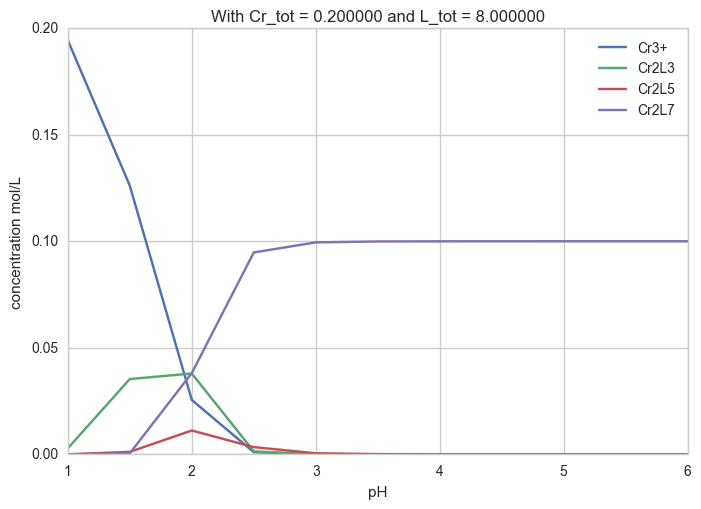

In [17]:
ax = df[["Cr3+", "Cr2L3", "Cr2L5", "Cr2L7"]].plot(
    kind="line", 
    title="With Cr_tot = %f and L_tot = %f" % (Cr_tot, L_tot),    
)
ax.set_xlabel("pH")
ax.set_ylabel("concentration mol/L")

## Bigger data

In [26]:
data = {
    "pH": [], "Cr_tot": [], "L_tot": [], 
    "Cr3+": [], "L-": [], "Cr2L3": [], "Cr2L5": [], "Cr2L7":[], 
    "ier": [], "msg": []
}
for pH in np.arange(1, 6.5, .5):
    for Cr_tot in np.arange(0.1, 0.9, .1):
        for L_tot in np.arange(0.1, 4, .1):
            params = (Kd2, Kd3, Kd4, pH, Ka, Cr_tot, L_tot)
            solution, info, ier, msg = fsolve(system, x0=[1e-6, L_tot], args=params, full_output=True)
    
            M, L = solution
            
            data["pH"].append(pH)
            data["Cr_tot"].append(Cr_tot)
            data["L_tot"].append(L_tot)
            data["Cr3+"].append(M)
            data["L-"].append(L)
            data["Cr2L3"].append(get_c_cplx(M, L, 3, Kd4))
            data["Cr2L5"].append(get_c_cplx(M, L, 5, Kd3))
            data["Cr2L7"].append(get_c_cplx(M, L, 7, Kd2))
            
            # save info about solution
            data["ier"].append(ier)
            data["msg"].append(msg)

In [42]:
l = ["a", "b", "c"]
l.insert(1, "d")
l.

In [45]:
# create a Data Frame
bdf = pd.DataFrame(data, columns=["pH", "Cr_tot", "L_tot", "Cr3+", "L-", "Cr2L3", "Cr2L5", "Cr2L7", "ier", "msg"])
# set pH as index
bdf.set_index("pH", inplace=True)
# Compute ration Cr3+_tot / L_tot 
bdf["Cr_tot/L_tot"] = df["Cr_tot"] / df["L_tot"]
# reorder columns
columns = bdf.columns.tolist()
columns.insert(2, columns[-1])
bdf = bdf[columns[:-1]]
# print Data Frame shape
print("(rows, columns) =", bdf.shape)
# save to csv
bdf.to_csv("dimitri.csv", sep=";")
# show data frame
bdf.head(20)

(rows, columns) = (3432, 10)


,Cr_tot,L_tot,Cr_tot/L_tot,Cr3+,L-,Cr2L3,Cr2L5,Cr2L7,ier,msg
pH,,,,,,,,,,
1.0,0.1,0.1,0.025,0.100000,0.000315,1.463769e-09,7.981404e-16,5.029518e-21,1,The solution converged.
1.0,0.1,0.2,0.025,0.100000,0.000630,1.171014e-08,2.554047e-14,6.437775e-19,1,The solution converged.
1.0,0.1,0.3,0.025,0.100000,0.000946,3.952166e-08,1.939475e-13,1.099951e-17,1,The solution converged.
1.0,0.1,0.4,0.025,0.100000,0.001261,9.368069e-08,8.172901e-13,8.240294e-17,1,The solution converged.
1.0,0.1,0.5,0.025,0.100000,0.001576,1.829692e-07,2.494158e-12,3.929254e-16,1,The solution converged.
1.0,0.1,0.6,0.025,0.099999,0.001891,3.161687e-07,6.206214e-12,1.407910e-15,1,The solution converged.
1.0,0.1,0.7,0.025,0.099999,0.002207,5.020596e-07,1.341394e-11,4.141880e-15,1,The solution converged.
1.0,0.1,0.8,0.025,0.099999,0.002522,7.494211e-07,2.615232e-11,1.054714e-14,1,The solution converged.
1.0,0.1,0.9,0.025,0.099998,0.002837,1.067031e-06,4.712656e-11,2.405441e-14,1,The solution converged.


In [30]:
error_bdf = bdf[bdf["ier"] != 1]
error_bdf

,Cr_tot,L_tot,Cr3+,L-,Cr2L3,Cr2L5,Cr2L7,ier,msg,Cr/L
pH,,,,,,,,,,
3.0,0.3,0.4,0.000001,0.400000,2.990654e-10,2.625641e-10,2.664065e-09,5,"The iteration is not making good progress, as ...",0.025
3.0,0.3,0.5,0.000001,0.500000,5.841121e-10,8.012821e-10,1.270325e-08,5,"The iteration is not making good progress, as ...",0.025
3.0,0.4,0.4,0.000001,0.400000,2.990654e-10,2.625641e-10,2.664065e-09,5,"The iteration is not making good progress, as ...",0.025
3.0,0.4,0.5,0.000001,0.500000,5.841121e-10,8.012821e-10,1.270325e-08,5,"The iteration is not making good progress, as ...",0.025
3.0,0.5,0.3,0.000001,0.300000,1.261682e-10,6.230769e-11,3.556098e-10,5,"The iteration is not making good progress, as ...",0.025
3.0,0.5,0.4,0.000001,0.400000,2.990654e-10,2.625641e-10,2.664065e-09,5,"The iteration is not making good progress, as ...",0.025
3.0,0.5,0.5,0.000001,0.500000,5.841121e-10,8.012821e-10,1.270325e-08,5,"The iteration is not making good progress, as ...",0.025
3.0,0.5,1.0,-0.178585,0.107671,1.860257e-01,1.183365e-02,8.699708e-03,4,"The iteration is not making good progress, as ...",0.025
3.0,0.6,0.3,0.000001,0.300000,1.261682e-10,6.230769e-11,3.556098e-10,5,"The iteration is not making good progress, as ...",0.025
